<a href="https://colab.research.google.com/github/FatimaShenno/ML-Projects/blob/main/First_project_bamboogeeks_STEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The project aims to develop a Supervised Learning model to detect fraudulent activities in electricity and gas consumption by customers of the Tunisian Company of Electricity and Gas (STEG). By analyzing billing history and using regression techniques, the model will classify customers based on their likelihood of committing fraud. This will help STEG reduce losses caused by fraudulent activities and enhance its revenues. The project involves Exploratory Data Analysis (EDA) and building ML models for classification.**

# **Install Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer


from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# **Get Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [ ]:
client_train = pd.read_csv("client_train.csv")
invoice_train = pd.read_csv("invoice_train.csv")

client_test = pd.read_csv("client_test.csv")
invoice_test = pd.read_csv("invoice_test.csv")

# **Data Discovery**

# ***A. Client Train File***

In [ ]:
client_train.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [ ]:
client_train.shape

(135493, 6)

In [ ]:
client_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [ ]:
client_train.isnull().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

In [ ]:
client_train.nunique()

disrict               4
client_id        135493
client_catg           3
region               25
creation_date      8088
target                2
dtype: int64

# ***B. Invoice Train File***

In [ ]:
invoice_train.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [ ]:
invoice_train.shape

(4476749, 16)

In [ ]:
invoice_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [ ]:
invoice_train.isnull().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [ ]:
invoice_train.nunique()

client_id               135493
invoice_date              8275
tarif_type                  17
counter_number          201893
counter_statue              16
counter_code                42
reading_remarque             8
counter_coefficient         16
consommation_level_1      8295
consommation_level_2     12576
consommation_level_3      2253
consommation_level_4     12075
old_index               155648
new_index               157980
months_number             1370
counter_type                 2
dtype: int64

# ***C. Merge Data***

In [ ]:
common_column = "client_id"
if common_column in client_train.columns and common_column in invoice_train.columns:

    df = pd.merge(client_train, invoice_train, on=common_column)

    df.to_csv('merged_data.csv')
else:
    print('The two DataFrames do not have the same common column.')

In [ ]:
df = pd.read_csv("merged_data.csv")

# **Data Discovery (Merged Data)**

In [ ]:
df.head()

,Unnamed: 0,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,0,60,train_Client_0,11,101,31/12/1994,0.0,2014-03-24,11,1335667,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,1,60,train_Client_0,11,101,31/12/1994,0.0,2013-03-29,11,1335667,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,2,60,train_Client_0,11,101,31/12/1994,0.0,2015-03-23,11,1335667,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,3,60,train_Client_0,11,101,31/12/1994,0.0,2015-07-13,11,1335667,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,4,60,train_Client_0,11,101,31/12/1994,0.0,2016-11-17,11,1335667,...,9,1,572,0,0,0,15066,15638,12,ELEC


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   disrict               int64  
 1   client_id             object 
 2   client_catg           int64  
 3   region                int64  
 4   creation_date         object 
 5   target                float64
 6   invoice_date          object 
 7   tarif_type            int64  
 8   counter_number        int64  
 9   counter_statue        object 
 10  counter_code          int64  
 11  reading_remarque      int64  
 12  counter_coefficient   int64  
 13  consommation_level_1  int64  
 14  consommation_level_2  int64  
 15  consommation_level_3  int64  
 16  consommation_level_4  int64  
 17  old_index             int64  
 18  new_index             int64  
 19  months_number         int64  
 20  counter_type          object 
dtypes: float64(1), int64(15), object(5)
memory usage: 717.3+ MB


In [ ]:
df.shape

(4476749, 21)

In [ ]:
df.isnull().sum()

disrict                 0
client_id               0
client_catg             0
region                  0
creation_date           0
target                  0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [ ]:
df.duplicated().sum()

11

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(4476738, 21)

In [ ]:
df.describe()

,disrict,client_catg,region,target,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06
mean,6.348247e+01,1.194379e+01,2.103584e+02,7.887641e-02,2.012804e+01,1.230590e+11,1.724882e+02,7.321705e+00,1.003040e+00,4.109805e+02,1.093227e+02,2.030625e+01,5.292601e+01,1.776701e+04,1.834972e+04,4.483105e+01
std,3.273404e+00,6.022374e+00,1.035828e+02,2.695458e-01,1.347256e+01,1.657269e+12,1.338869e+02,1.571655e+00,3.083470e-01,7.573087e+02,1.220125e+03,1.574241e+02,8.754735e+02,4.036695e+04,4.095323e+04,3.128339e+03
min,6.000000e+01,1.100000e+01,1.010000e+02,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.200000e+01,1.100000e+01,1.030000e+02,0.000000e+00,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,6.200000e+01,1.100000e+01,3.010000e+02,0.000000e+00,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,6.300000e+01,1.100000e+01,3.090000e+02,0.000000e+00,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,6.900000e+01,5.100000e+01,3.990000e+02,1.000000e+00,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


In [ ]:
df["disrict"].value_counts()

62    1332062
63    1077832
69    1076942
60     989902
Name: disrict, dtype: int64

In [ ]:
df["target"].value_counts()

0.0    4123629
1.0     353109
Name: target, dtype: int64

In [ ]:
df["counter_type"].value_counts()

ELEC    3079398
GAZ     1397340
Name: counter_type, dtype: int64

In [ ]:
df["client_catg"].value_counts()

11    4304880
51     103929
12      67929
Name: client_catg, dtype: int64

In [ ]:
df["region"].value_counts()

101    1069262
311     509808
104     400665
301     316403
107     303450
103     294480
303     197946
306     195225
310     165366
312     156195
304     146515
302     143970
309     128819
305      94276
307      85531
313      76924
105      53131
371      53021
308      28699
106      24212
372      17013
379      13255
399       1566
206       1004
199          2
Name: region, dtype: int64

In [ ]:
# we have wrong value,so will drop the wrong value
df["counter_statue"].value_counts()

0         4346960
1           73496
0           32048
5           20484
4            2706
1             540
3             258
5             144
2              32
4              23
46             14
A              13
618            12
769             6
269375          1
420             1
Name: counter_statue, dtype: int64

In [ ]:
df["counter_number"].value_counts()

0                43161
2786               251
630317             230
162709             226
963                220
                 ...  
306104               1
4920158              1
431951               1
2188701271500        1
375249               1
Name: counter_number, Length: 201893, dtype: int64

# **Data Cleaning**

In [ ]:
def get_day_month_year(df, column_name):
    # Convert the column to a datetime datatype
    df[column_name] = pd.to_datetime(df[column_name])

    # Create new columns for the day, month, and year for creation_date and invoice_date
    df[column_name+"_"+"day"] = df[column_name].dt.day
    df[column_name+"_"+"month"] = df[column_name].dt.month
    df[column_name+"_"+"year"] = df[column_name].dt.year
    return df

def convert_datatype(df, column_name):
    df[column_name] = df[column_name].astype(int)
    return df

def convert_datatype_object(df, column_name):
    df[column_name] = df[column_name].astype('str')
    return df

def remove_rows_greater_than(df, column_name, threshold):
    df = df[df[column_name] <= threshold]
    return df

def remove_rows_not_equal(df, column_name, values_to_remove):
    df = df[~df[column_name].isin(values_to_remove)]
    return df

def remove_rows_with_count(df, column_name, count_value):
    column_value_counts = df[column_name].value_counts()
    count_1_keys = len(column_value_counts[column_value_counts == count_value])
    keys_with_count_1 = column_value_counts[column_value_counts == count_value].index.tolist()
    df = df[~df[column_name].isin(keys_with_count_1)]
    return df

In [ ]:
get_day_month_year(df, "invoice_date")
get_day_month_year(df, "creation_date")

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,old_index,new_index,months_number,counter_type,invoice_date_day,invoice_date_month,invoice_date_year,creation_date_day,creation_date_month,creation_date_year
0,60,train_Client_0,11,101,1994-12-31,0.0,2014-03-24,11,1335667,0,...,14302,14384,4,ELEC,24,3,2014,31,12,1994
1,60,train_Client_0,11,101,1994-12-31,0.0,2013-03-29,11,1335667,0,...,12294,13678,4,ELEC,29,3,2013,31,12,1994
2,60,train_Client_0,11,101,1994-12-31,0.0,2015-03-23,11,1335667,0,...,14624,14747,4,ELEC,23,3,2015,31,12,1994
3,60,train_Client_0,11,101,1994-12-31,0.0,2015-07-13,11,1335667,0,...,14747,14849,4,ELEC,13,7,2015,31,12,1994
4,60,train_Client_0,11,101,1994-12-31,0.0,2016-11-17,11,1335667,0,...,15066,15638,12,ELEC,17,11,2016,31,12,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,60,train_Client_99998,11,101,1993-12-22,0.0,2005-08-19,10,1253571,0,...,3197,3732,8,ELEC,19,8,2005,22,12,1993
4476745,60,train_Client_99998,11,101,1993-12-22,0.0,2005-12-19,10,1253571,0,...,3732,3938,4,ELEC,19,12,2005,22,12,1993
4476746,60,train_Client_99999,11,101,1986-02-18,0.0,1996-09-25,11,560948,0,...,13884,14143,4,ELEC,25,9,1996,18,2,1986
4476747,60,train_Client_99999,11,101,1986-02-18,0.0,1996-05-28,11,560948,0,...,13281,13884,4,ELEC,28,5,1996,18,2,1986


In [ ]:
#1 Drop 'A' value from column
value_to_drop = 'A'
df = df.loc[df['counter_statue'] != value_to_drop]


#2 Convert the type of data
convert_datatype(df,'counter_statue')


# The int values to drop
rows_to_drop =  [46, 618, 769, 269375, 420]

#3 Drop the int values from the column
df = df.loc[~df["counter_statue"].isin(rows_to_drop)]

df['counter_statue'].value_counts().index

Int64Index([0, 1, 5, 4, 3, 2], dtype='int64')

In [ ]:
df['counter_statue'].value_counts()

0    4379008
1      74036
5      20628
4       2729
3        258
2         32
Name: counter_statue, dtype: int64

In [ ]:
df= remove_rows_greater_than(df, 'months_number', 12)
df = df[df['months_number'] != 0]
df['months_number'].value_counts()

4     3680467
8      278770
2      270892
1      113266
12      54328
6       34678
3        7280
10       6993
5        3945
7        1245
9         559
11        247
Name: months_number, dtype: int64

In [ ]:
# Define the values to remove from the 'counter_coefficient' column
counter_coefficient_remove = [11, 50, 33, 5, 20, 10]
tarif_type_remove =  [18,24]
counter_code_remove = [0,1,325 ,367]
counter_statuet_remove =  [11,50,33,5,20,10]

# Call the function to remove rows where 'counter_coefficient' is not equal to any of the specified values
df=remove_rows_not_equal(df, 'counter_coefficient', counter_coefficient_remove)
df=remove_rows_not_equal(df, 'counter_code', counter_code_remove)
df=remove_rows_not_equal(df, 'tarif_type', tarif_type_remove)
df=remove_rows_not_equal(df, 'counter_statue', counter_statuet_remove)

In [ ]:
# Call the function to remove rows where 'counter_number' occurs only once
df = remove_rows_with_count(df, 'counter_number', 1)
df['counter_number'].value_counts()

0          40646
2786         251
630317       230
162709       226
963          219
           ...  
612833         2
4475149        2
9515769        2
679016         2
276488         2
Name: counter_number, Length: 192026, dtype: int64

# **Data Visualization (Merged Data)**

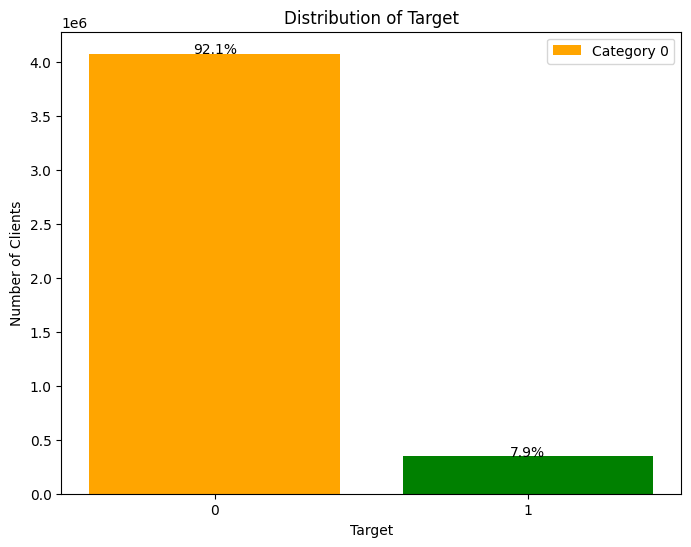

In [ ]:
data = df.groupby(['target'])['client_id'].count()
percentages = [100 * count / sum(data) for count in data]

colors = ['orange', 'green']

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x=['0', '1'], height=data.values, color=colors)

ax.set_xlabel('Target')
ax.set_ylabel('Number of Clients')
ax.set_title('Distribution of Target')

ax.legend(['Category 0', 'Category 1'])

for i, v in enumerate(percentages):
    ax.text(i, data.values[i]+50, f'{v:.1f}%', ha='center')

plt.show()

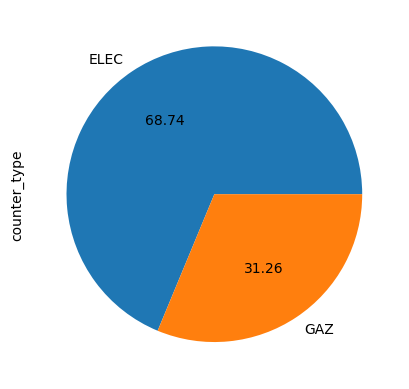

In [ ]:
df['counter_type'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

<Axes: title={'center': 'The Effect of the Two Largest Values that have an Impact on the Target'}, xlabel='disrict', ylabel='client_catg'>

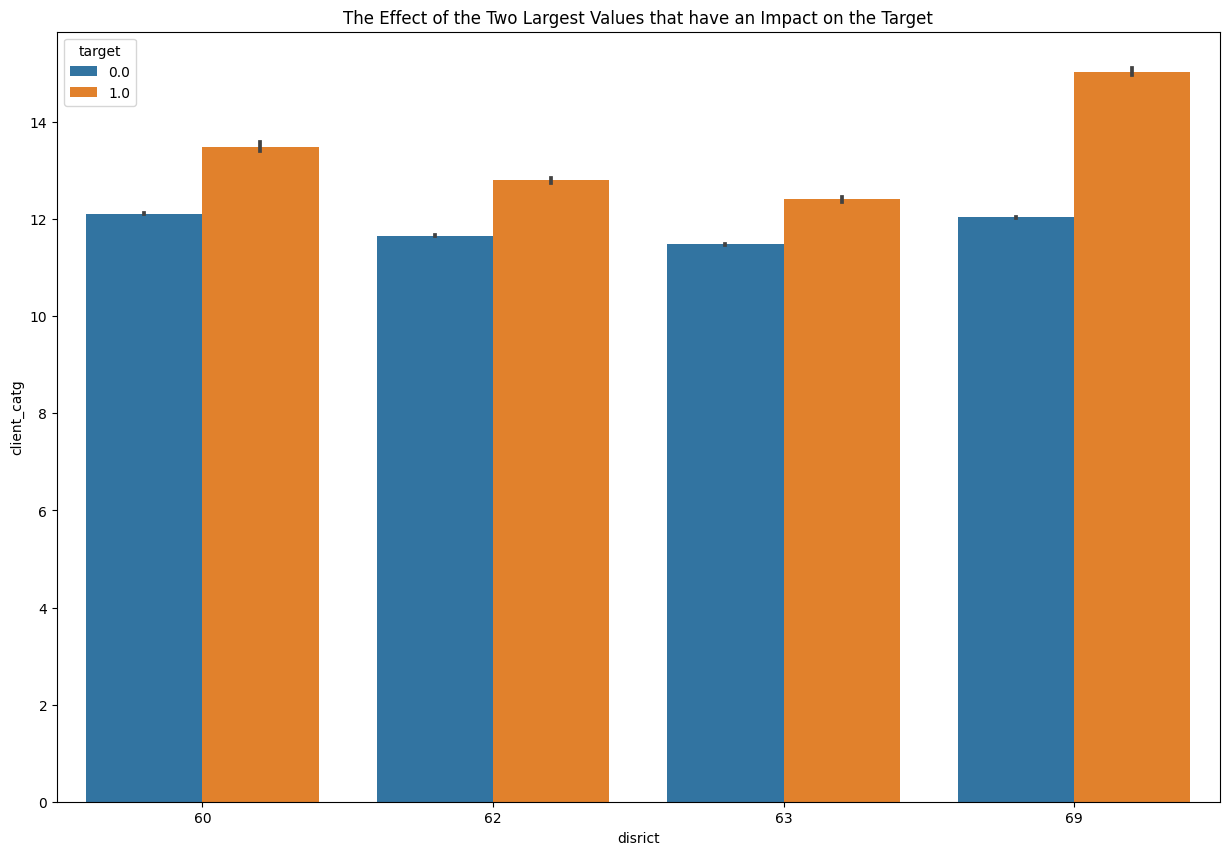

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("The Effect of the Two Largest Values that have an Impact on the Target")
sns.barplot( data = df, x = 'disrict' , y = 'client_catg', hue ='target' )

<Axes: xlabel='region', ylabel='Count'>

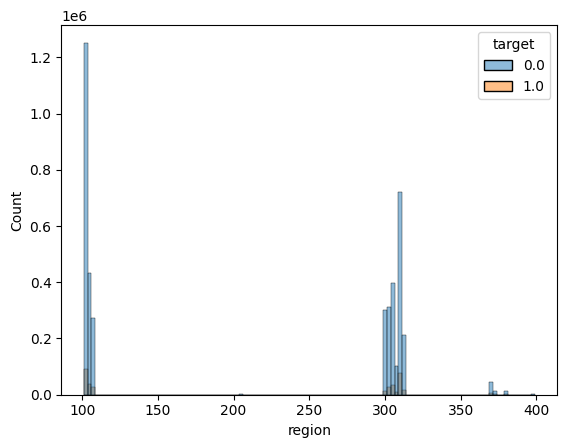

In [ ]:
sns.histplot(data = df , x ='region' , hue = 'target')

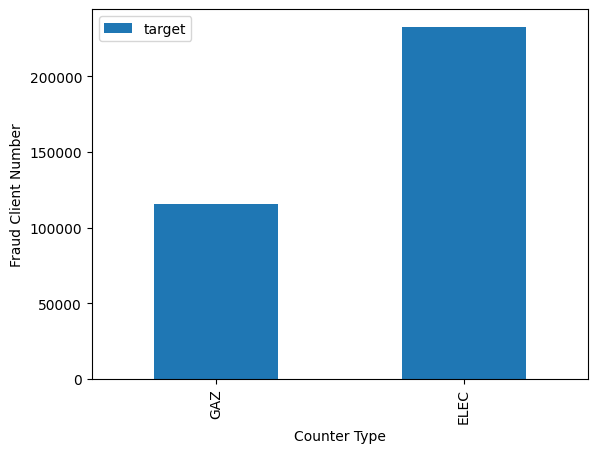

In [ ]:
fraud = df[df['target']==1]
counter_type= fraud[['counter_type','target']].groupby('counter_type').count()
counter_type.sort_values('counter_type', ascending=False).plot(kind='bar')
plt.xlabel('Counter Type')
plt.ylabel('Fraud Client Number')
plt.show()

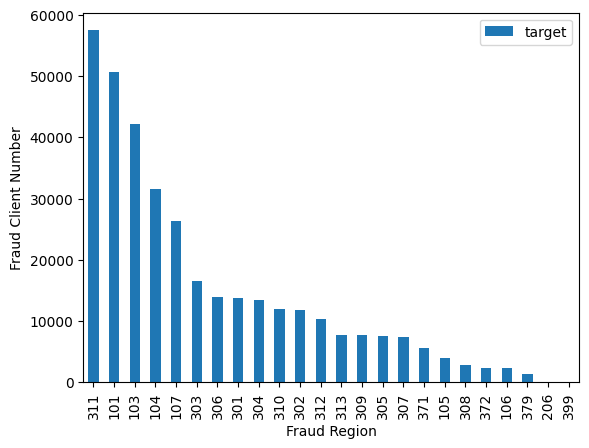

In [ ]:
fraud_region= fraud[['region','target']].groupby('region').count()
fraud_region.sort_values('target', ascending=False).plot(kind='bar')
plt.xlabel('Fraud Region')
plt.ylabel('Fraud Client Number')
plt.show()

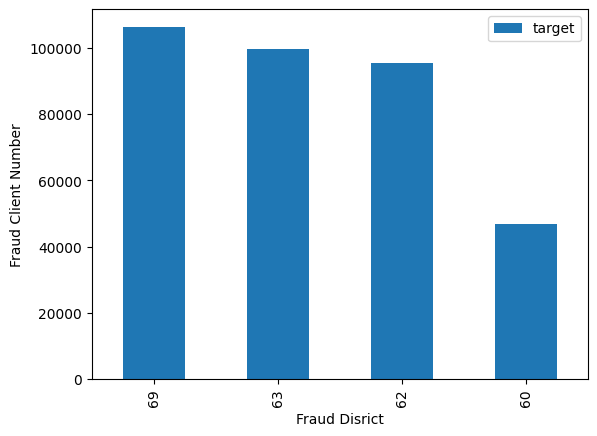

In [ ]:
fraud_disrict= fraud[['disrict','target']].groupby('disrict').count()
fraud_disrict.sort_values('target', ascending=False).plot(kind='bar')
plt.xlabel('Fraud Disrict')
plt.ylabel('Fraud Client Number')
plt.show()

In [ ]:
df['invoice_date_year'].unique()

array([2014, 2013, 2015, 2016, 2017, 2018, 2019, 2011, 2008, 2012, 2010,
       2005, 2006, 2007, 2009, 1993, 1995, 1996, 1999, 1985, 1984, 1998,
       2002, 2003, 1981, 1980, 1994, 2001, 2000, 1989, 1990, 1997, 1988,
       1987, 2004, 1986, 1991, 1992, 1979, 1982, 1978, 1983, 1977])

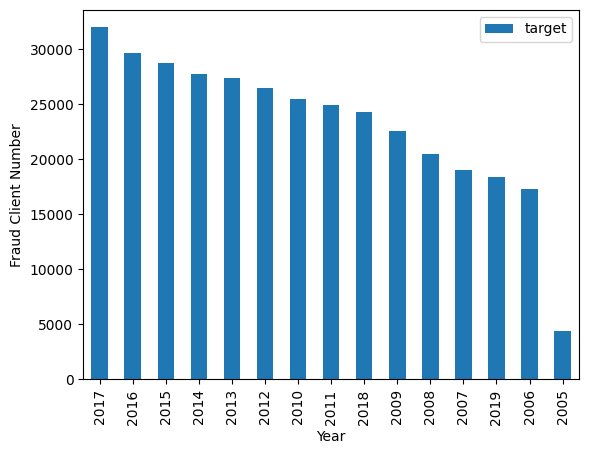

In [ ]:
fraud['invoice_date'] = pd.to_datetime(fraud['invoice_date'])

# Create a new column that contains the year of the invoice date
fraud['invoice_date_year'] = fraud['invoice_date'].dt.year

# Group the data by year and count the number of fraud clients
year_invoice = fraud[['invoice_date_year', 'target']].groupby('invoice_date_year').count()

year_invoice.sort_values('target', ascending=False).plot(kind='bar')

plt.xlabel('Year')
plt.ylabel('Fraud Client Number')
plt.show()

In [ ]:
df['invoice_date_month'].unique()

array([ 3,  7, 11, 12,  2, 10,  6,  1,  9,  5,  4,  8])

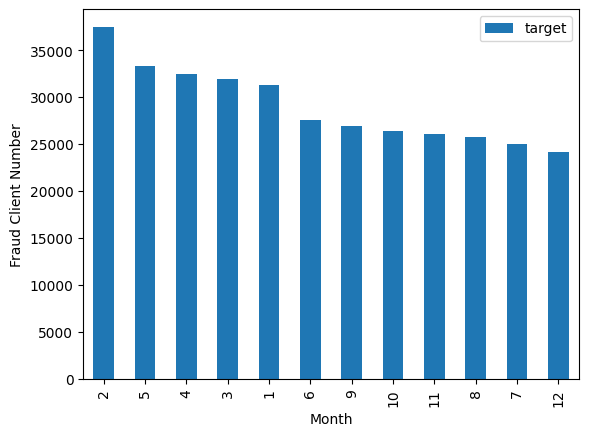

In [ ]:
fraud['invoice_date_month'] = fraud['invoice_date'].dt.month
month_invoice= fraud[['invoice_date_month','target']].groupby('invoice_date_month').count()
month_invoice.sort_values('target', ascending=False).plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Fraud Client Number')
plt.show()

In [ ]:
df['invoice_date_day'].unique()

array([24, 29, 23, 13, 17,  7, 19, 22, 25, 18, 27, 30, 12, 26, 28,  4,  2,
       10,  6,  3, 11, 31, 15, 14, 16, 20,  5,  9, 21,  8,  1])

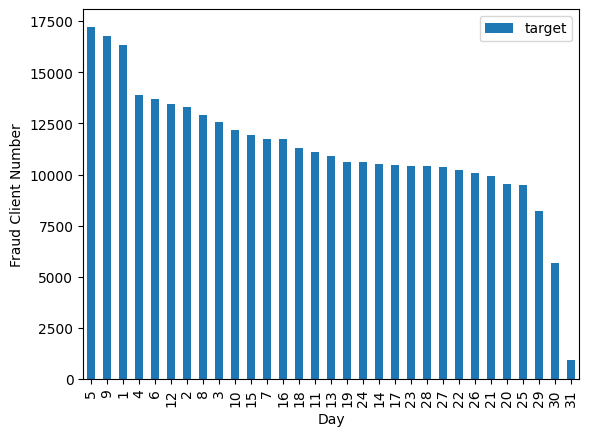

In [ ]:
fraud['invoice_date_day'] = fraud['invoice_date'].dt.day
day_invoice= fraud[['invoice_date_day','target']].groupby('invoice_date_day').count()
day_invoice.sort_values('target', ascending=False).plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Fraud Client Number')
plt.show()

<Axes: title={'center': 'Histogram to creation_date_year'}, xlabel='creation_date_year', ylabel='Density'>

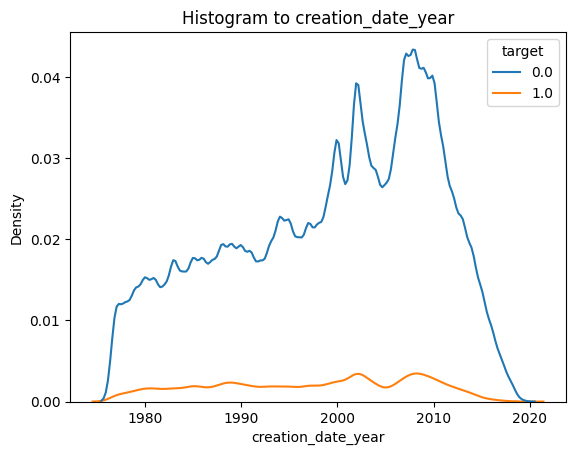

In [ ]:
plt.title ("Histogram to creation_date_year")
sns.kdeplot(data = df , x ='creation_date_year', hue = 'target')

<Axes: title={'center': 'Histogram to invoice_date_year'}, xlabel='invoice_date_year', ylabel='Count'>

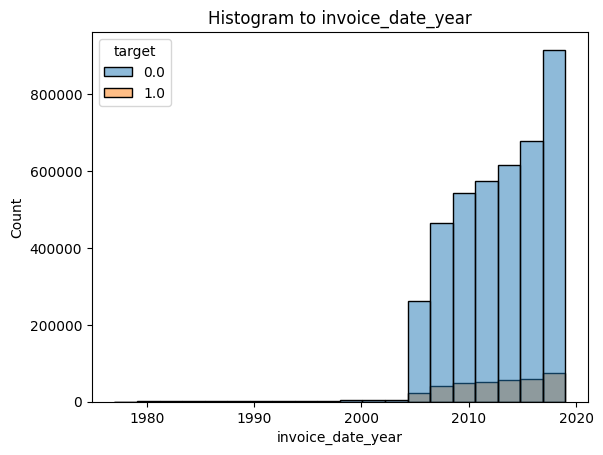

In [ ]:
plt.title ("Histogram to invoice_date_year")
sns.histplot(data = df , x ='invoice_date_year'  ,bins=20,hue = 'target')

<Axes: title={'center': 'Histogram of Petal new and old indexes'}, xlabel='new_index', ylabel='old_index'>

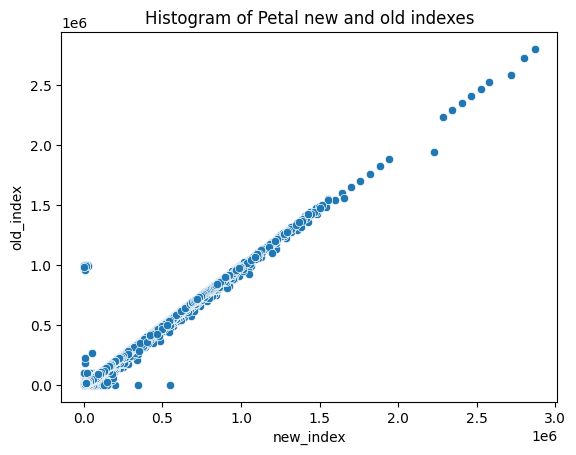

In [ ]:
plt.Figure(figsize = (13 , 10))
plt.title('Histogram of Petal new and old indexes')
sns.scatterplot(data = df, x = 'new_index' , y = 'old_index')

<Axes: >

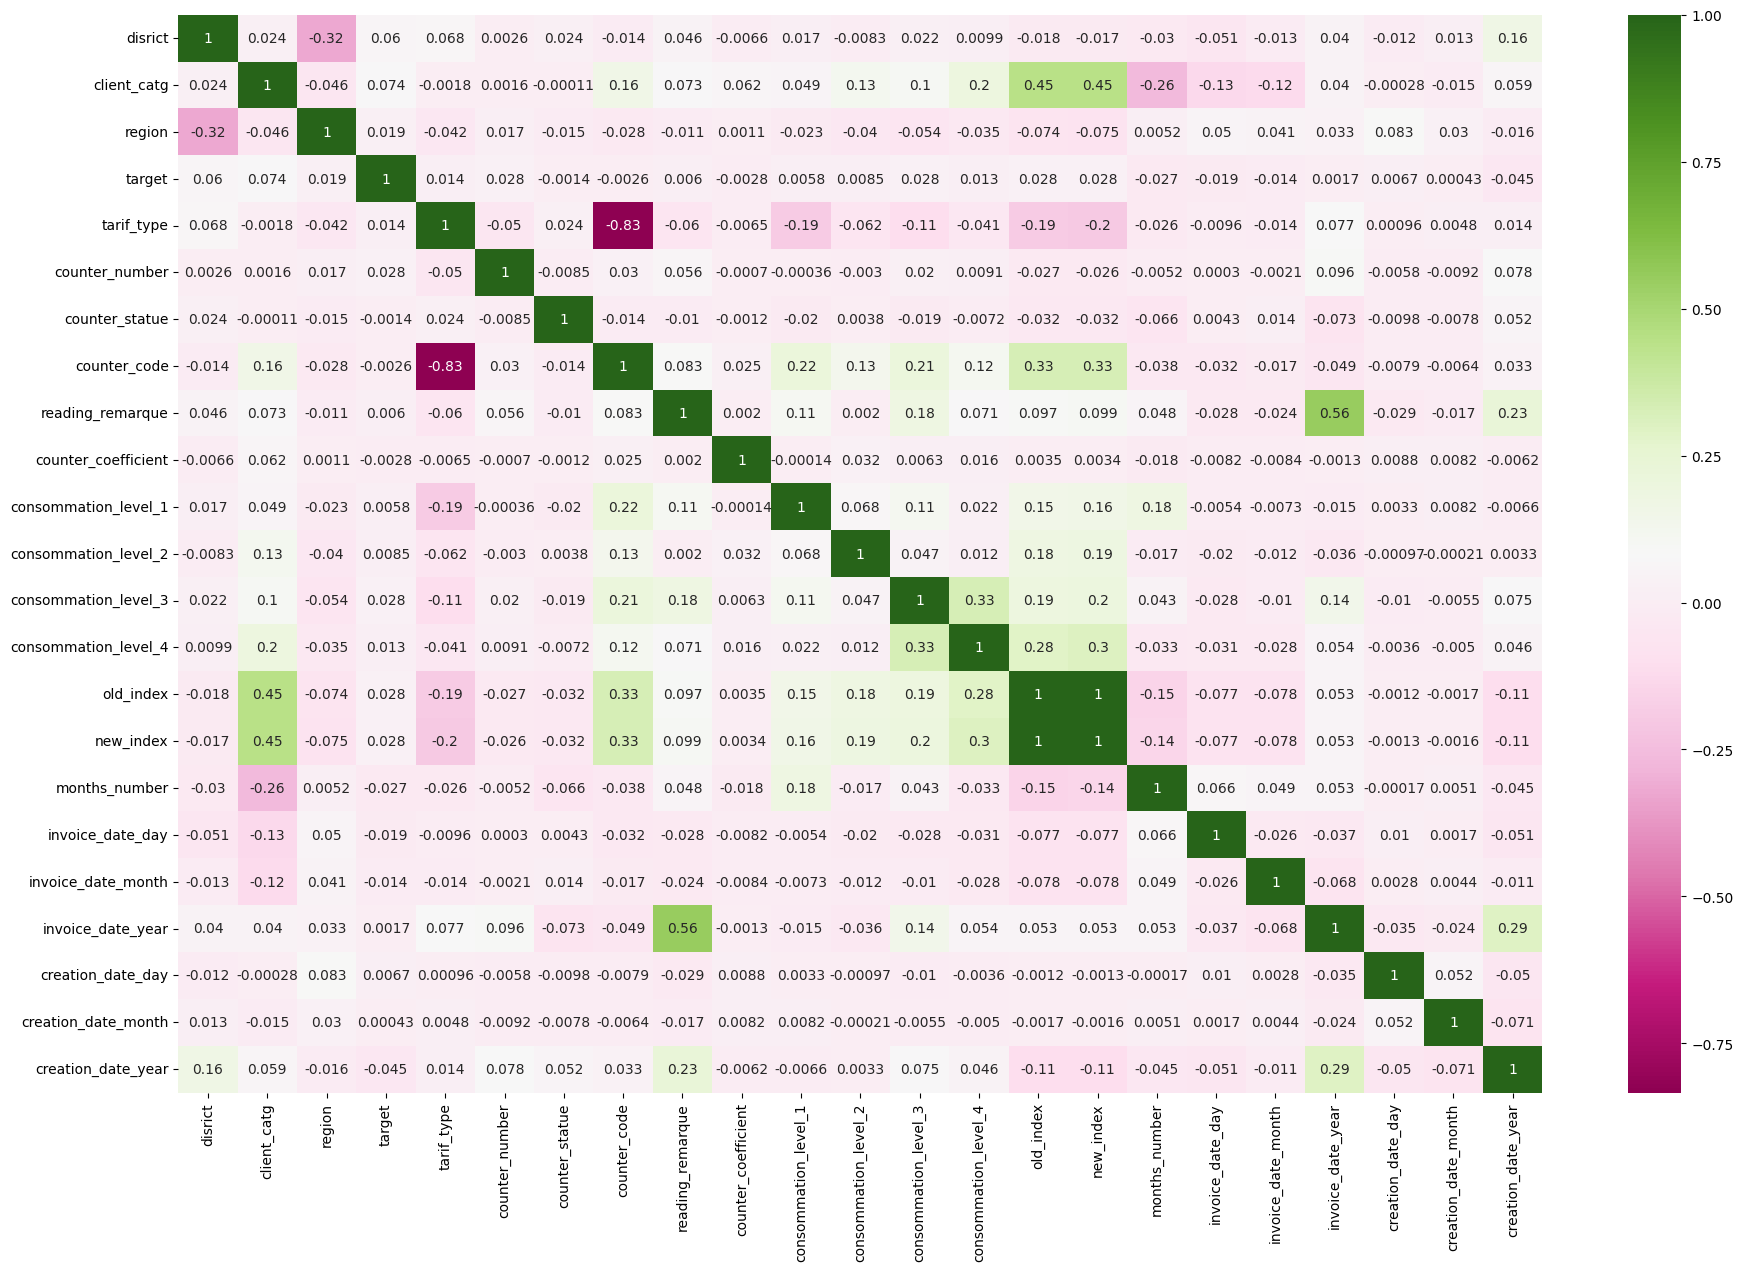

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(22, 14), dpi=100)
sns.heatmap(df_corr, annot=True, cmap='PiYG')

# **Prepare the Data**

In [ ]:
df = df.drop(columns=['creation_date', 'invoice_date', 'client_id','old_index'])
df.columns

Index(['disrict', 'client_catg', 'region', 'target', 'tarif_type',
       'counter_number', 'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'new_index',
       'months_number', 'counter_type', 'invoice_date_day',
       'invoice_date_month', 'invoice_date_year', 'creation_date_day',
       'creation_date_month', 'creation_date_year'],
      dtype='object')

In [ ]:
df.shape

(4424473, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4424473 entries, 0 to 4476748
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   disrict               int64  
 1   client_catg           int64  
 2   region                int64  
 3   target                float64
 4   tarif_type            int64  
 5   counter_number        int64  
 6   counter_statue        int64  
 7   counter_code          int64  
 8   reading_remarque      int64  
 9   counter_coefficient   int64  
 10  consommation_level_1  int64  
 11  consommation_level_2  int64  
 12  consommation_level_3  int64  
 13  consommation_level_4  int64  
 14  new_index             int64  
 15  months_number         int64  
 16  counter_type          object 
 17  invoice_date_day      int64  
 18  invoice_date_month    int64  
 19  invoice_date_year     int64  
 20  creation_date_day     int64  
 21  creation_date_month   int64  
 22  creation_date_year    int64  
dtypes: floa

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
Cat_Features = (df.dtypes == "object")
Cat_Features = list(Cat_Features[Cat_Features].index)
Cat_Features

['counter_type']

In [ ]:
df_num = X.drop(Cat_Features, axis = 1)
df_cat = X[Cat_Features]

In [ ]:
df_num.head()

,disrict,client_catg,region,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,...,consommation_level_3,consommation_level_4,new_index,months_number,invoice_date_day,invoice_date_month,invoice_date_year,creation_date_day,creation_date_month,creation_date_year
0,60,11,101,11,1335667,0,203,8,1,82,...,0,0,14384,4,24,3,2014,31,12,1994
1,60,11,101,11,1335667,0,203,6,1,1200,...,0,0,13678,4,29,3,2013,31,12,1994
2,60,11,101,11,1335667,0,203,8,1,123,...,0,0,14747,4,23,3,2015,31,12,1994
3,60,11,101,11,1335667,0,207,8,1,102,...,0,0,14849,4,13,7,2015,31,12,1994
4,60,11,101,11,1335667,0,207,9,1,572,...,0,0,15638,12,17,11,2016,31,12,1994


In [ ]:
df_cat.head()

,counter_type
0,ELEC
1,ELEC
2,ELEC
3,ELEC
4,ELEC


In [ ]:
num_attribs = list(df_num)
cat_attribs = list(df_cat)

full_transform = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

In [ ]:
df_prepared= full_transform.fit_transform(X)

In [ ]:
df_prepared.shape

(4424473, 23)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(df_prepared, y, test_size=0.2,
                                                        shuffle =True,
                                                        stratify=y,
                                                        random_state=42)

In [ ]:
X_train.shape

(3539578, 23)

# **Build the Model**

In [ ]:
# Model training and evaluation
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=9, criterion='entropy'),
    'xgBoost': XGBClassifier(n_estimators=100, max_depth= 7, learning_rate=0.0001, eta=0.1),
    'LogisticRegression' : LogisticRegression(max_iter=1000, solver = 'liblinear' ),
    'QDA' : QuadraticDiscriminantAnalysis(reg_param=0.0001),
    'LDA' : LinearDiscriminantAnalysis(solver='svd', tol=0.001 ),
    'Bagging' : BaggingClassifier(n_estimators = 370 , max_samples = 31 , random_state =  40 , max_features=13),
    'DTree' : DecisionTreeClassifier( criterion ='entropy', splitter = 'random' ,max_depth=71, min_samples_leaf=3, random_state=80)
}
scores = {}

In [ ]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_valid = model.predict(X_valid)
    score = model.score(X_valid, y_valid)
    scores[model_name] = score
    print(f"{model_name} Train Accuracy = {model.score(X_train, y_train)}")
    print(f"{model_name} Test Accuracy = {score}")
    print(f"{model_name} Report\n{classification_report(y_valid, y_pred_valid)}\n")

Random Forest Train Accuracy = 0.9214635190974744
Random Forest Test Accuracy = 0.9214223156419689
Random Forest Report
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    815173
         1.0       1.00      0.00      0.01     69722

    accuracy                           0.92    884895
   macro avg       0.96      0.50      0.48    884895
weighted avg       0.93      0.92      0.88    884895


xgBoost Train Accuracy = 0.922569583153698
xgBoost Test Accuracy = 0.9224744178687867
xgBoost Report
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    815173
         1.0       0.70      0.03      0.05     69722

    accuracy                           0.92    884895
   macro avg       0.81      0.51      0.51    884895
weighted avg       0.91      0.92      0.89    884895


LogisticRegression Train Accuracy = 0.9211942779619491
LogisticRegression Test Accuracy = 0.9211985602811633
LogisticRegres

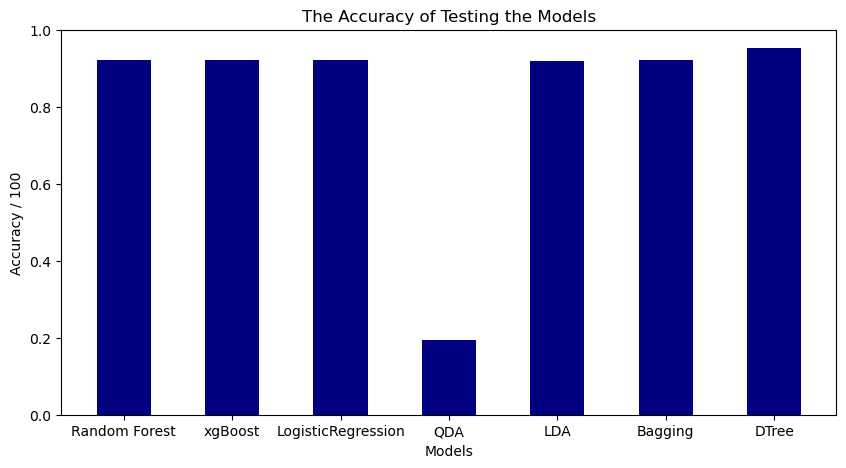

In [ ]:
# Plotting accuracy results
fig = plt.figure(figsize=(10, 5))
plt.bar(scores.keys(), scores.values(), color='navy', width=0.5)
plt.xlabel("Models")
plt.ylabel("Accuracy / 100")
plt.title("The Accuracy of Testing the Models")
plt.show()

# **Testing**

In [ ]:
common_column = "client_id"
if common_column in client_test.columns and common_column in invoice_test.columns:

    data = pd.merge(client_test, invoice_test, on=common_column)

    data.to_csv('merged_test_data.csv')
else:
    print('The two DataFrames do not have the same common column.')

In [ ]:
data = pd.read_csv("merged_test_data.csv")

In [ ]:
data.isna().sum().sort_values(ascending = False)

Unnamed: 0              0
reading_remarque        0
months_number           0
new_index               0
old_index               0
consommation_level_4    0
consommation_level_3    0
consommation_level_2    0
consommation_level_1    0
counter_coefficient     0
counter_code            0
disrict                 0
counter_statue          0
counter_number          0
tarif_type              0
invoice_date            0
creation_date           0
region                  0
client_catg             0
client_id               0
counter_type            0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
get_day_month_year(data, "invoice_date")
get_day_month_year(data, "creation_date")
data = data.drop(columns=['Unnamed: 0','creation_date', 'invoice_date','old_index'])
data.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'tarif_type',
       'counter_number', 'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'new_index',
       'months_number', 'counter_type', 'invoice_date_day',
       'invoice_date_month', 'invoice_date_year', 'creation_date_day',
       'creation_date_month', 'creation_date_year'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939730 entries, 0 to 1939729
Data columns (total 23 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   disrict               int64 
 1   client_id             object
 2   client_catg           int64 
 3   region                int64 
 4   tarif_type            int64 
 5   counter_number        int64 
 6   counter_statue        int64 
 7   counter_code          int64 
 8   reading_remarque      int64 
 9   counter_coefficient   int64 
 10  consommation_level_1  int64 
 11  consommation_level_2  int64 
 12  consommation_level_3  int64 
 13  consommation_level_4  int64 
 14  new_index             int64 
 15  months_number         int64 
 16  counter_type          object
 17  invoice_date_day      int64 
 18  invoice_date_month    int64 
 19  invoice_date_year     int64 
 20  creation_date_day     int64 
 21  creation_date_month   int64 
 22  creation_date_year    int64 
dtypes: int64(21), object(2)
memory u

In [ ]:
data.drop_duplicates(subset='client_id', keep='last', inplace=True)

In [ ]:
submission = data[["client_id"]]

In [ ]:
data = data.drop(columns=['client_id'])

In [ ]:
data_prepared = full_transform.transform(data)
data_prepared.shape

(58069, 23)

In [ ]:
LR = models['LogisticRegression']

y_pred_proba = LR.predict_proba(data_prepared)[ : , 1]
y_pred_proba

array([0.06599502, 0.07115525, 0.06980462, ..., 0.06364582, 0.04618547,
       0.12538641])

In [ ]:
y_pred_proba.shape

(58069,)

In [ ]:
submission["target"] = y_pred_proba
submission

,client_id,target
36,test_Client_0,0.065995
58,test_Client_1,0.071155
132,test_Client_10,0.069805
172,test_Client_100,0.041644
225,test_Client_1000,0.260058
...,...,...
1939590,test_Client_9995,0.076533
1939636,test_Client_9996,0.065804
1939695,test_Client_9997,0.063646
1939696,test_Client_9998,0.046185


# **Saving the Predictions to a CSV File**

In [ ]:
result_reg = pd.DataFrame({'client_id': submission['client_id'], 'target': submission['target']})
file_path = 'STEG_predictions_Reg.csv'
result_reg.to_csv(file_path, index=False)
print("File saved at:",file_path)